In [1]:
import numpy as np
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVR,SVC
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
import matplotlib.pyplot as plt
import os 
import ML_function as mf

In [14]:
# get current working directory
current = os.getcwd()

# load AGG data 
AGG_Reg = pd.read_csv(current + '/Shift_data/' + 'rw_AGG.csv') 
AGG_Cla = pd.read_csv(current + '/Shift_data/' + 'cw_AGG.csv')

# train 
train,validation,test = mf.rolling_windows(AGG_Reg,900,100,250,250)
train_,validation_,test_ = mf.rolling_windows(AGG_Cla,900,100,250,250)

In [15]:
# The best parameters from support vector machine 
AGG_Reg_parameter_sv = mf.SV_CV(train,type='regression')
AGG_Cla_parameter_sv = mf.SV_CV(train_,type='classification')
print(AGG_Reg_parameter_sv)
print(AGG_Cla_parameter_sv)

# Generate the prediction from SVM
AGG_Reg_Result_SV = mf.SV_Prediction(AGG_Reg_parameter_sv,train,test,type='regression')
AGG_Cla_Result_SV = mf.SV_Prediction(AGG_Reg_parameter_sv,train_,test_,type='classification')

print(mean_absolute_error(AGG_Reg_Result_SV['y_pred'],AGG_Reg_Result_SV['y_true']))
print(accuracy_score(AGG_Cla_Result_SV['y_pred'],AGG_Cla_Result_SV['y_true']))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[{'C': 0.001, 'gamma': 0.001}, {'C': 0.001, 'gamma': 0.001}, {'C': 0.001, 'gamma': 0.001}]
[{'C': 1.0, 'gamma': 5}, {'C': 1.0, 'gamma': 1}, {'C': 0.001, 'gamma': 0.001}]
0.0018130939288707015
0.5555555555555556


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Don

In [10]:
# The best parameter from RF 
AGG_Reg_parameter_rf = mf.RF_CV(train,type='regression')
AGG_CLa_parameter_rf = mf.RF_CV(train_,type='classification')

90


In [31]:
# Generate the prediction from SVM
AGG_Reg_Result_RF = mf.RF_Prediction(AGG_Reg_parameter_rf,train,test,type='regression')
AGG_Cla_Result_RF = mf.RF_Prediction(AGG_Reg_parameter_rf,train_,test_,type='classification')

print(mean_absolute_error(AGG_Reg_Result_RF['y_pred'],AGG_Reg_Result_RF['y_true']))
print(accuracy_score(AGG_Cla_Result_RF['y_pred'],AGG_Cla_Result_RF['y_true']))

print(AGG_Reg_parameter_rf)
print(AGG_CLa_parameter_rf)

0.001343805525683998
0.61
[{'max_depth': 1, 'max_features': 1, 'n_estimators': 100}, {'max_depth': 1, 'max_features': 1, 'n_estimators': 200}]
[{'max_depth': 12, 'max_features': 1, 'n_estimators': 100}, {'max_depth': 5, 'max_features': 7, 'n_estimators': 100}]


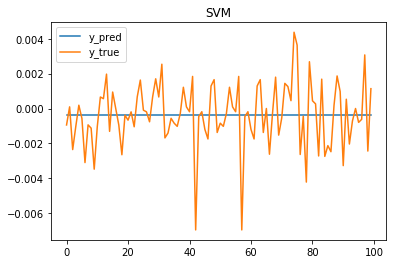

In [32]:
# SVM
plt.plot(AGG_Reg_Result_SV['y_pred'],label='y_pred')
plt.plot(AGG_Reg_Result_SV['y_true'],label='y_true')
plt.title('SVM')
plt.legend()

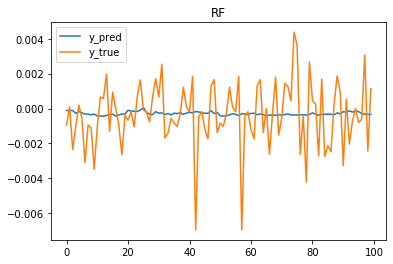

In [33]:
# RF
plt.plot(AGG_Reg_Result_RF['y_pred'],label='y_pred')
plt.plot(AGG_Reg_Result_RF['y_true'],label='y_true')
plt.title('RF')
plt.legend()

In [17]:
# Save to the file
current = os.getcwd()
print(current)

/Users/baihaohuang/Desktop/FE800_Data


In [16]:
AGG_Reg_Result_SV.to_csv(current+'/Result/Regression/AGG_Reg_SVR.csv')
AGG_Cla_Result_SV.to_csv(current+'/Result/Classification/AGG_Cla_SVM.csv')
AGG_Reg_Result_RF.to_csv(current+'/Result/Regression/AGG_Reg_RF.csv')
AGG_Cla_Result_RF.to_csv(current+'/Result/Classification/AGG_Cla_RF.csv')



NameError: name 'AGG_Reg_Result_RF' is not defined

In [ ]:
For i